In [2]:
import import_ipynb
%run utils.ipynb


In [3]:
# Load the datasets
folder_path = "./CICIDS_2019/"
train_data, val_data, test_data = load_and_explore_datasets(folder_path)


Train Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287688 entries, 0 to 3287687
Data columns (total 59 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Flow Duration             int64  
 1   Total Fwd Packets         int64  
 2   Total Backward Packets    int64  
 3   Fwd Packets Length Total  float64
 4   Bwd Packets Length Total  float64
 5   Fwd Packet Length Max     float64
 6   Fwd Packet Length Mean    float64
 7   Fwd Packet Length Std     float64
 8   Bwd Packet Length Max     float64
 9   Bwd Packet Length Mean    float64
 10  Bwd Packet Length Std     float64
 11  Flow Bytes/s              float64
 12  Flow Packets/s            float64
 13  Flow IAT Mean             float64
 14  Flow IAT Std              float64
 15  Flow IAT Max              float64
 16  Flow IAT Min              float64
 17  Fwd IAT Total             float64
 18  Fwd IAT Mean              float64
 19  Fwd IAT Std               float64
 20  Fwd IAT M

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd

def preprocess_data(train_data, val_data, test_data):
    le = LabelEncoder()
    scaler = StandardScaler()

    # Extract the 'Label' column for each dataset
    train_labels = train_data['Label']
    val_labels = val_data['Label']
    test_labels = test_data['Label']

    # Print unique labels before encoding
    print("Unique labels in train data:", train_labels.unique())
    print("Unique labels in validation data:", val_labels.unique())
    print("Unique labels in test data:", test_labels.unique())

    # Fit the LabelEncoder on training labels
    print("\nFitting LabelEncoder on training labels...")
    le.fit(train_labels)
    print("Classes found by LabelEncoder:", le.classes_)

    # Encode the labels for train, validation, and test datasets
    print("\nEncoding labels for train, validation, and test datasets...")
    train_labels_encoded = le.transform(train_labels)
    val_labels_encoded = le.transform(val_labels)
    test_labels_encoded = le.transform(test_labels)

    # Print the encoded labels for verification
    print("\nEncoded Train Labels (first 10):", train_labels_encoded[:10])
    print("Encoded Validation Labels (first 10):", val_labels_encoded[:10])
    print("Encoded Test Labels (first 10):", test_labels_encoded[:10])

    # Process features for each dataset (train, val, test)
    def process_features(data, label_encoder=None, fit_scaler=False):
        features = data.drop(columns=['Label'])
        numeric_features = features.select_dtypes(include=['number'])
        categorical_features = features.select_dtypes(exclude=['number'])

        # Print feature shapes
        print(f"\nFeatures shape (numeric): {numeric_features.shape}")
        print(f"Features shape (categorical): {categorical_features.shape}")

        if label_encoder:
            print("\nEncoding categorical features...")
            categorical_features = categorical_features.apply(label_encoder.fit_transform)

        combined_features = pd.concat([numeric_features, categorical_features], axis=1)

        # Print combined features before scaling
        print("\nCombined features (before scaling):\n", combined_features.head())

        # Fill missing values with 0 (if any)
        combined_features.fillna(0, inplace=True)

        if fit_scaler:
            print("\nScaling features (fit on train data)...")
            return scaler.fit_transform(combined_features)
        else:
            print("\nScaling features (transform on val/test data)...")
            return scaler.transform(combined_features)

    # Process train, validation, and test features
    print("\nProcessing train dataset features...")
    X_train = process_features(train_data, le, fit_scaler=True)

    print("\nProcessing validation dataset features...")
    X_val = process_features(val_data, le)

    print("\nProcessing test dataset features...")
    X_test = process_features(test_data, le)

    # Prepare the labels
    y_train = train_labels_encoded
    y_val = val_labels_encoded
    y_test = test_labels_encoded

    # Print final processed shapes
    print("\nFinal shapes of processed data:")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    # Get unique labels across all datasets (train, val, test) and store in a list
    labels = list(set(train_labels.unique()).union(val_labels.unique(), test_labels.unique()))

    return X_train, y_train, X_val, y_val, X_test, y_test, le, scaler, labels

X_train, y_train, X_val, y_val, X_test, y_test, le, scaler, labels = preprocess_data(train_data, val_data, test_data)


Unique labels in train data: ['Benign' 'DoS-Hulk' 'DDoS-LOIC-HTTP' 'DDoS' 'DoS-Goldeneye' 'DDoS-HOIC'
 'Infiltration' 'DDoS-TFTP' 'DDoS-MSSQL' 'Botnet' 'DDoS-NTP'
 'DoS-Slowhttptest' 'DDoS-Syn' 'DDoS-UDPLag' 'Bruteforce-SSH'
 'DoS-Slowloris' 'DDoS-UDP' 'Bruteforce-FTP' 'Webattack-bruteforce'
 'Portscan' 'DDoS-NetBIOS' 'DDoS-DNS' 'DDoS-Slowloris' 'DDoS-Ddossim'
 'DoS-Slowread' 'Webattack-XSS' 'DDoS-SNMP' 'DoS-Slowheaders'
 'DoS-Slowbody' 'DoS-Rudy' 'DDoS-LDAP' 'Webattack-SQLi' 'DoS-Heartbleed'
 nan]


Unique labels in validation data: ['DDoS-LOIC-HTTP' 'Benign' 'DDoS-HOIC' 'DDoS-NTP' 'Botnet' 'DDoS-TFTP'
 'DDoS-DNS' 'DoS-Hulk' 'DDoS' 'DDoS-UDP' 'DDoS-Ddossim' 'Infiltration'
 'Bruteforce-SSH' 'DDoS-MSSQL' 'DoS-Slowloris' 'DoS-Goldeneye' 'DDoS-Syn'
 'DoS-Slowhttptest' 'DDoS-UDPLag' 'Webattack-bruteforce' 'DoS-Slowheaders'
 'DDoS-Slowloris' 'Bruteforce-FTP' 'DoS-Slowread' 'DDoS-SNMP' 'Portscan'
 'DDoS-LDAP' 'Webattack-XSS' 'DoS-Rudy' 'DDoS-NetBIOS' 'DoS-Slowbody'
 'Webattack-SQLi' 'DoS-Heartbleed']
Unique labels in test data: ['DDoS-LOIC-HTTP' 'Benign' 'Botnet' 'DoS-Hulk' 'DDoS-HOIC' 'DDoS-NTP'
 'Infiltration' 'DDoS' 'DoS-Goldeneye' 'Bruteforce-SSH' 'DDoS-Syn'
 'DDoS-MSSQL' 'DDoS-TFTP' 'DDoS-DNS' 'DDoS-UDP' 'Bruteforce-FTP'
 'DDoS-LDAP' 'DoS-Slowloris' 'Webattack-bruteforce' 'Portscan'
 'DDoS-Slowloris' 'DDoS-UDPLag' 'DoS-Slowhttptest' 'DoS-Slowread'
 'DoS-Slowbody' 'DDoS-SNMP' 'DDoS-Ddossim' 'DoS-Heartbleed'
 'DoS-Slowheaders' 'DDoS-NetBIOS' 'DoS-Rudy' 'Webattack-XSS'
 'Webattack-SQLi

/tmp/ipykernel_9161/432265042.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=data, palette='Set2')


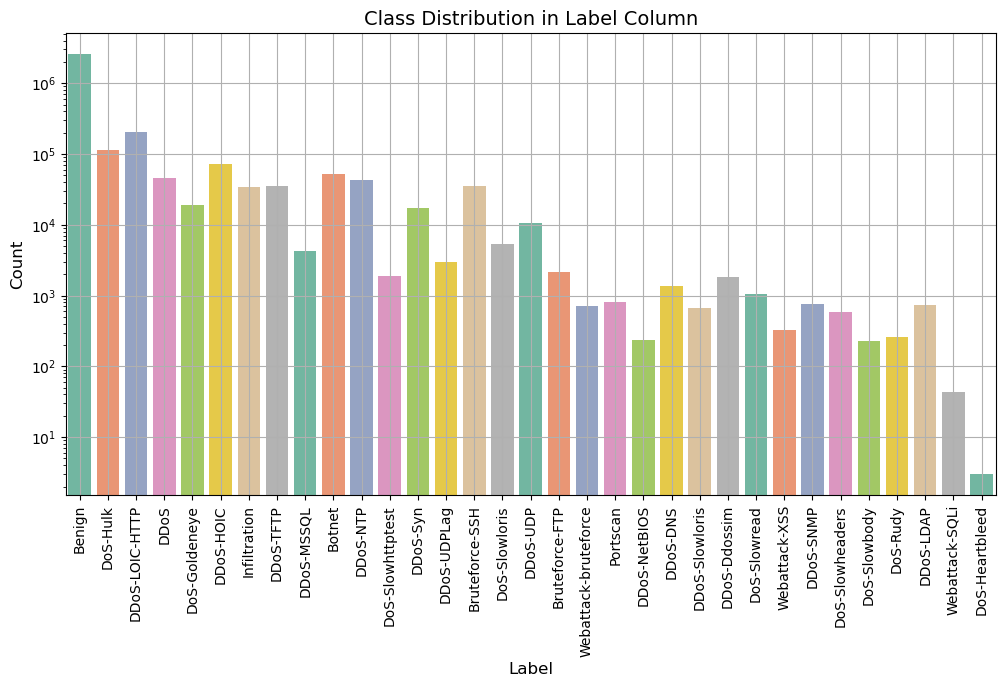

In [5]:
def plot_class_distribution_(data, column='Label'):
    plt.rcParams.update({'font.size': 8})
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=data, palette='Set2')
    plt.title(f"Class Distribution in {column} Column", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.tick_params(axis='both', labelsize=10)
    plt.yscale('log')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

plot_class_distribution_(train_data)


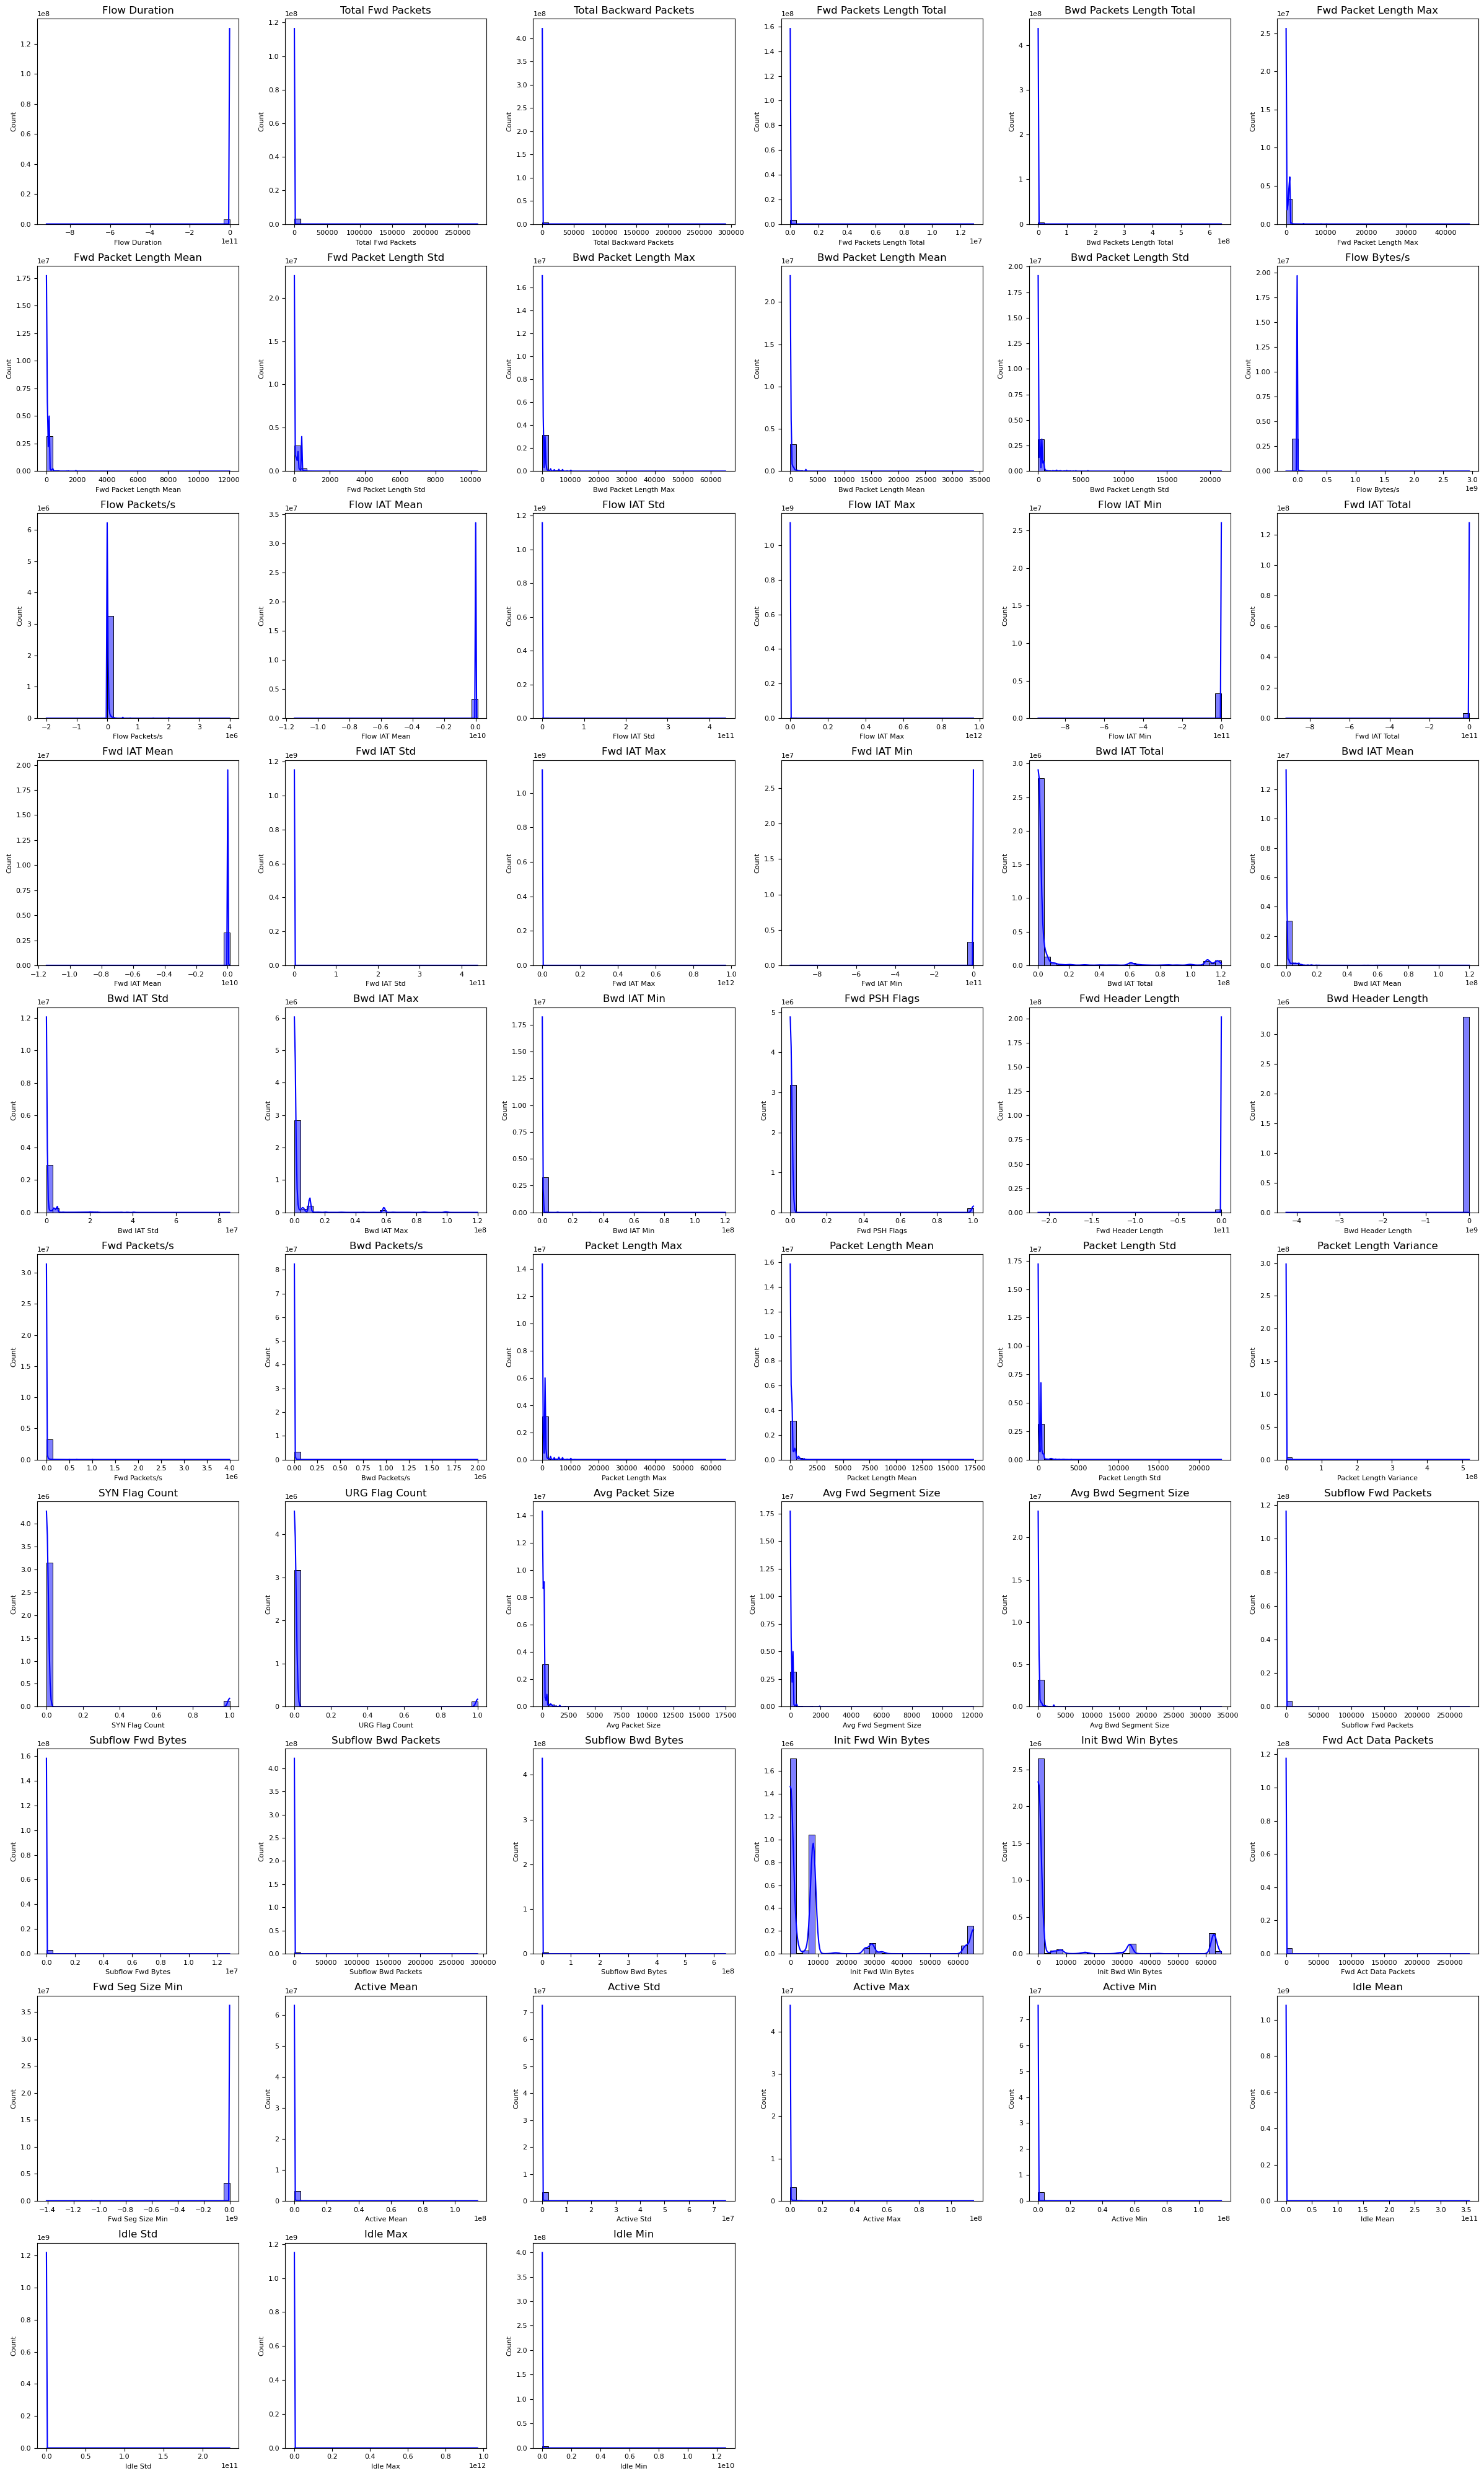

In [6]:
def plot_numeric_feature_distribution(data, numeric_features, cols=6):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    rows = (len(numeric_features) + cols - 1) // cols
    plt.figure(figsize=(cols * 4, rows * 4))
    
    for idx, feature in enumerate(numeric_features, 1):
        plt.subplot(rows, cols, idx)
        sns.histplot(data[feature], kde=True, bins=30, color='blue')
        plt.title(feature, fontsize=12)
        plt.tight_layout()
    
    plt.show()
    
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns
plot_numeric_feature_distribution(train_data, numeric_features, cols=6)


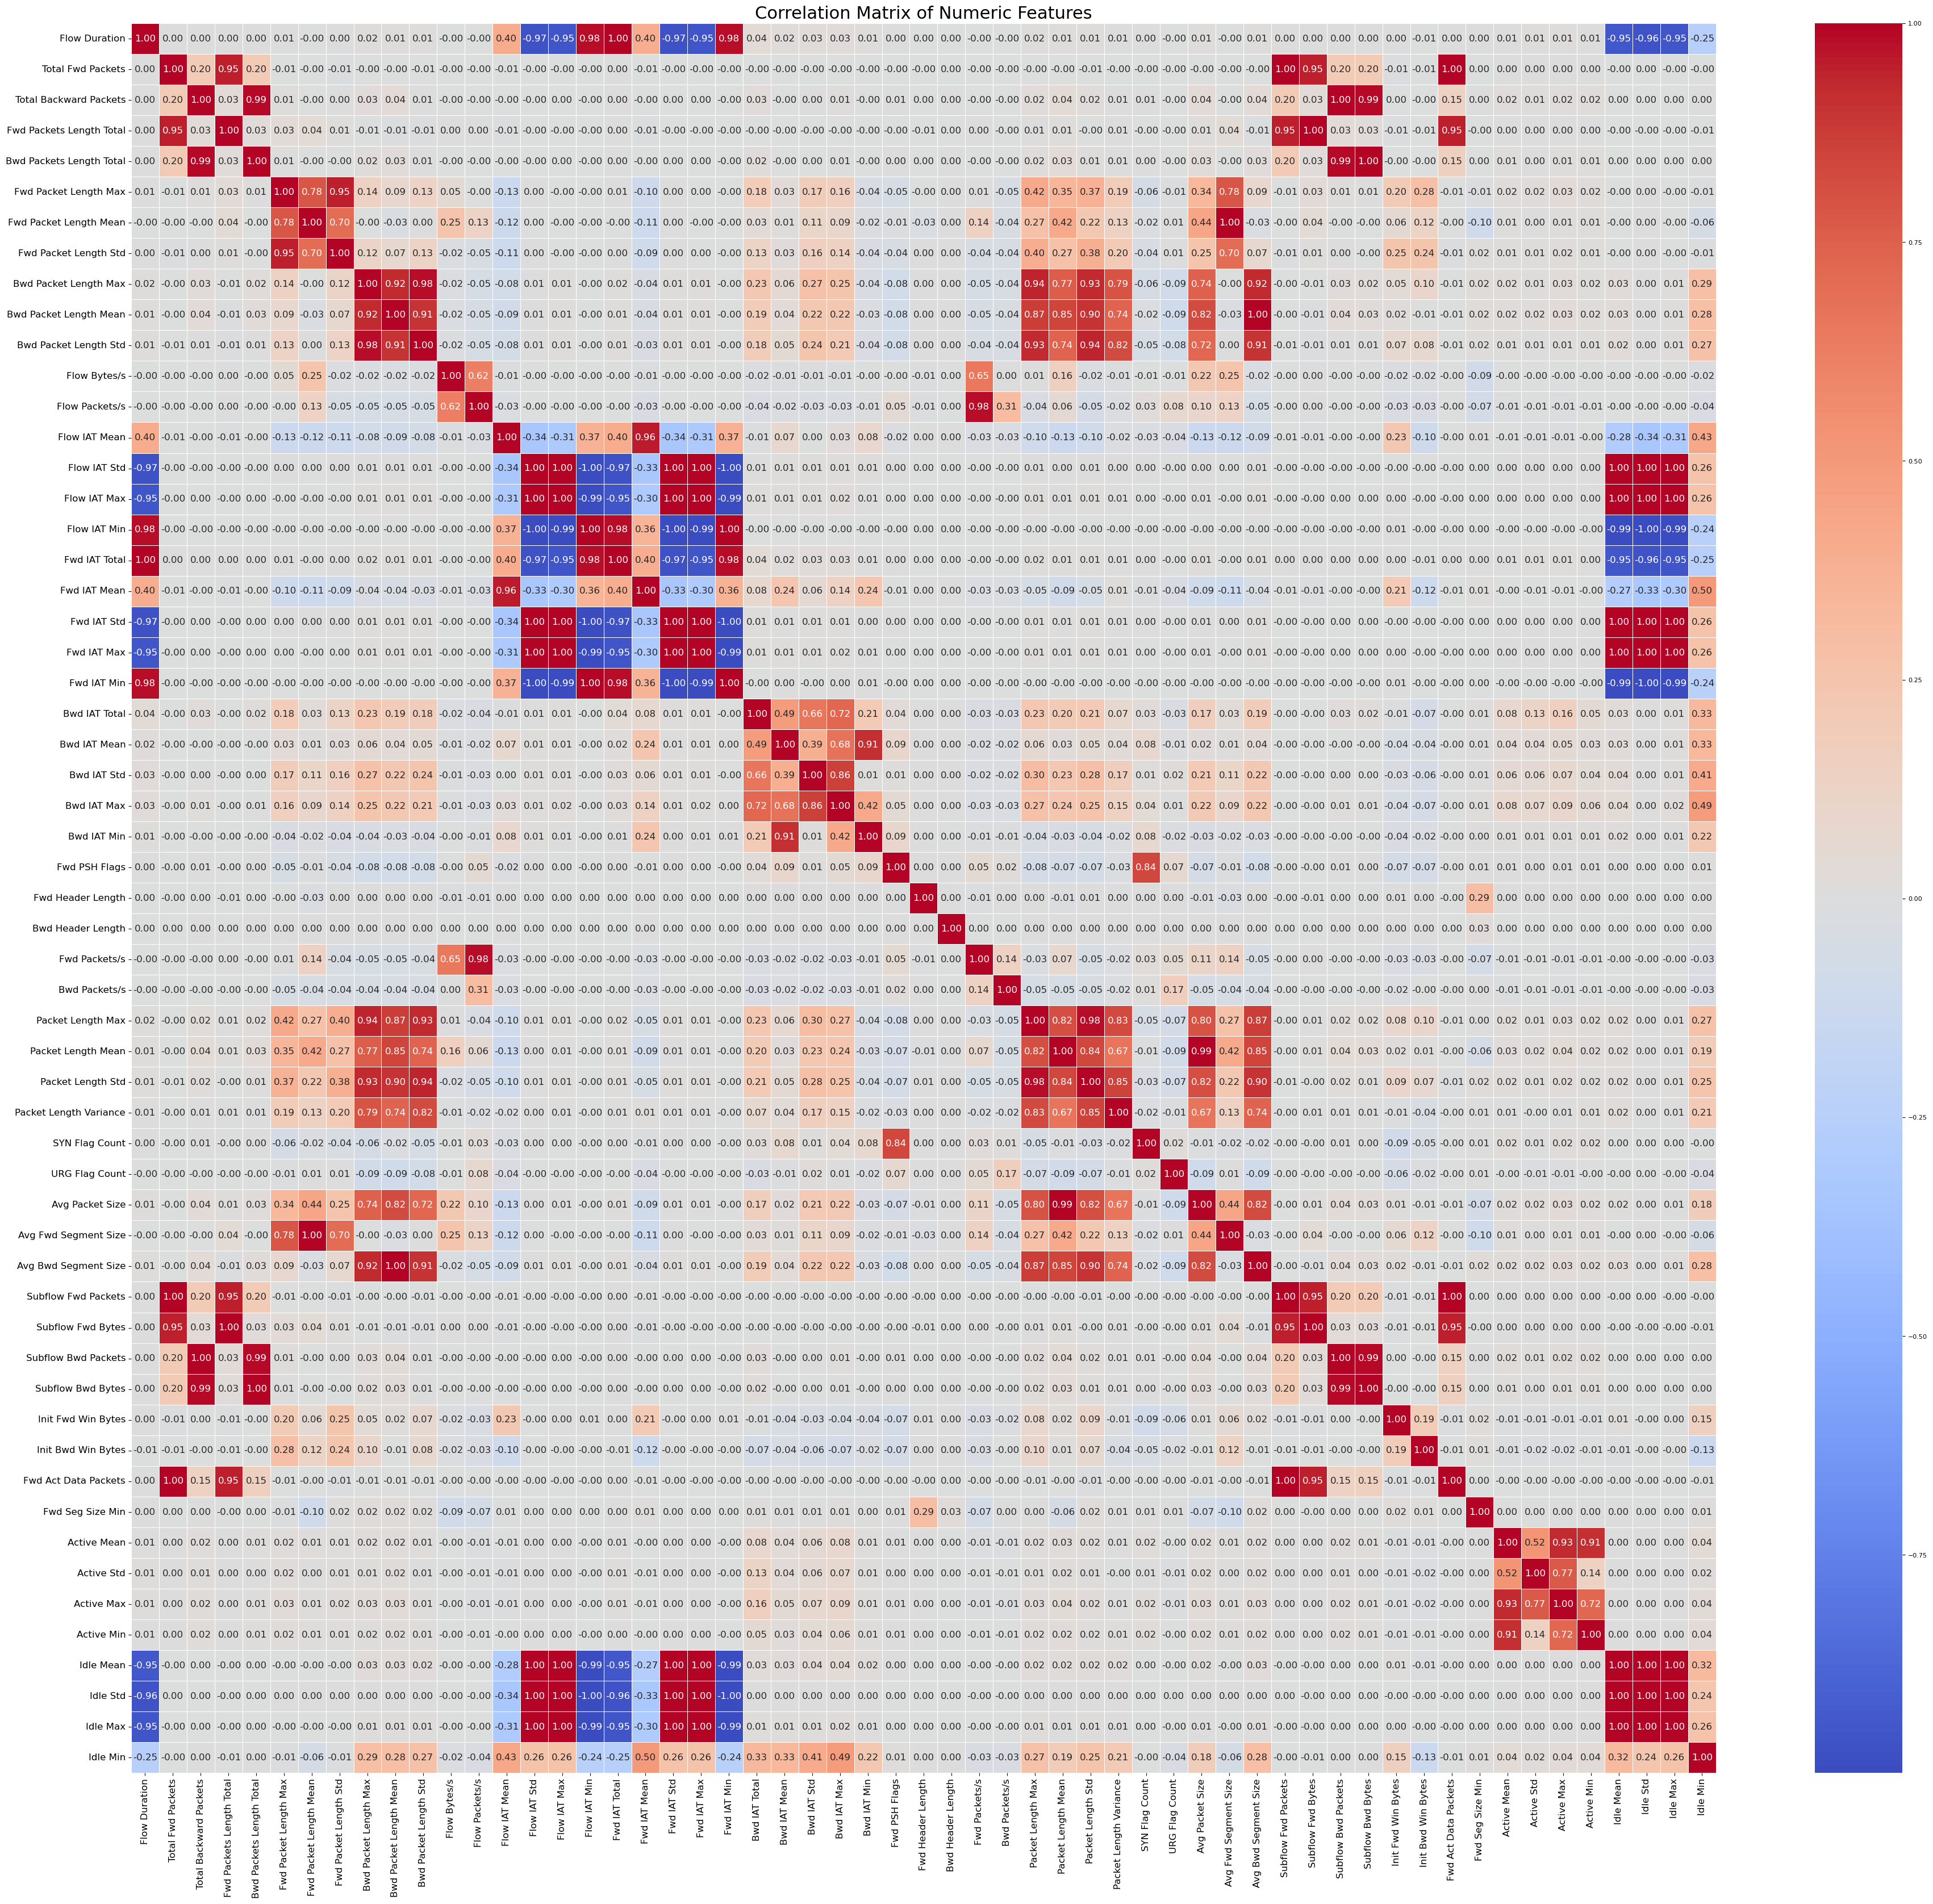

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_matrix(data, numeric_features):
    correlation_matrix = data[numeric_features].corr()
    plt.figure(figsize=(45, 40))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size":12})

    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.title("Correlation Matrix of Numeric Features", fontsize=22)
    plt.show()

plot_correlation_matrix(train_data, numeric_features)

In [8]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Save reports
output_dir = r"./report/"
os.makedirs(output_dir, exist_ok=True)

# Traditional statistical methods
def t_test(X_train, X_val, y_train, y_val):
    t_stat, p_value = stats.ttest_ind(y_train, y_val)
    return p_value

def anova(X_train, X_val, y_train, y_val):
    f_stat, p_value = stats.f_oneway(y_train, y_val)
    return p_value

def linear_regression(X_train, X_val, y_train, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

def multiple_regression(X_train, X_val, y_train, y_val):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    return mse

def f_test(X_train, X_val, y_train, y_val):
    model1 = LinearRegression().fit(X_train, y_train)
    model2 = LinearRegression().fit(X_val, y_val)
    rss1 = np.sum((y_train - model1.predict(X_train)) ** 2)
    rss2 = np.sum((y_val - model2.predict(X_val)) ** 2)
    f_stat = (rss1 - rss2) / rss2
    p_value = 1 - stats.f.cdf(f_stat, len(X_train) - 1, len(X_val) - 1)
    return p_value

def mann_whitney_u(X_train, X_val, y_train, y_val):
    u_stat, p_value = stats.mannwhitneyu(y_train, y_val)
    return p_value

def pca(X_train, X_val, y_train, y_val):
    # Apply PCA and return the explained variance ratio
    pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return pca.explained_variance_ratio_

def tsne(X_train, X_val, y_train, y_val):
    # Apply t-SNE for dimensionality reduction
    tsne = TSNE(n_components=2, random_state=42)
    X_train_tsne = tsne.fit_transform(X_train)
    X_val_tsne = tsne.fit_transform(X_val)
    return X_train_tsne, X_val_tsne

# List of traditional statistical methods
methods = {
    't-test': t_test,
    'ANOVA': anova,
    'Linear Regression': linear_regression,
    'Multiple Regression': multiple_regression,
    'F-Test': f_test,
    'Mann-Whitney U Test': mann_whitney_u,
    'PCA': pca,
    't-SNE': tsne
}

# Store evaluation results for each method
results = []

# Standardize the data before applying PCA and t-SNE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Train and evaluate each statistical method on the validation set
for name, method in methods.items():
    if name in ['Linear Regression', 'Multiple Regression']:
        # Apply linear regression and calculate mean squared error (MSE)
        mse = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'Validation MSE': mse
        })
    elif name in ['PCA', 't-SNE']:
        # Apply PCA or t-SNE for dimensionality reduction and report explained variance
        if name == 'PCA':
            explained_variance = method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Explained Variance Ratio': explained_variance
            })
        elif name == 't-SNE':
            # t-SNE returns transformed data; we'll just note this operation
            method(X_train_scaled, X_val_scaled, y_train, y_val)
            results.append({
                'Model': name,
                'Data after t-SNE': 'Transformed'
            })
    else:
        # Apply t-test, ANOVA, F-Test, Mann-Whitney U Test on the validation set
        p_value = method(X_train_scaled, X_val_scaled, y_train, y_val)
        results.append({
            'Model': name,
            'P-Value': p_value
        })

# Display the evaluation results
results_df = pd.DataFrame(results)
print("Model Evaluation on Validation Set:")
print(results_df)

# Save the validation set results
results_file = os.path.join(output_dir, 'statistical_method_validation_results.csv')
results_df.to_csv(results_file, index=False)
print(f"Validation set results saved to {results_file}")


Model Evaluation on Validation Set:
                 Model       P-Value  Validation MSE  \
0               t-test  5.720482e-01             NaN   
1                ANOVA  5.720482e-01             NaN   
2    Linear Regression           NaN       73.920811   
3  Multiple Regression           NaN       73.920811   
4               F-Test  1.110223e-16             NaN   
5  Mann-Whitney U Test  9.995355e-01             NaN   
6                  PCA           NaN             NaN   
7                t-SNE           NaN             NaN   

                   Explained Variance Ratio Data after t-SNE  
0                                       NaN              NaN  
1                                       NaN              NaN  
2                                       NaN              NaN  
3                                       NaN              NaN  
4                                       NaN              NaN  
5                                       NaN              NaN  
6  [0.193081058750

In [9]:
import pandas as pd
import os

results_df['Set'] = 'Validation'

print("\nCombined Results for Statistical Methods:")
print(results_df)

combined_results_file = os.path.join(output_dir, 'combined_statistical_method_results.csv')
results_df.to_csv(combined_results_file, index=False)
print(f"Combined results saved to {combined_results_file}")



Combined Results for Statistical Methods:
                 Model       P-Value  Validation MSE  \
0               t-test  5.720482e-01             NaN   
1                ANOVA  5.720482e-01             NaN   
2    Linear Regression           NaN       73.920811   
3  Multiple Regression           NaN       73.920811   
4               F-Test  1.110223e-16             NaN   
5  Mann-Whitney U Test  9.995355e-01             NaN   
6                  PCA           NaN             NaN   
7                t-SNE           NaN             NaN   

                   Explained Variance Ratio Data after t-SNE         Set  
0                                       NaN              NaN  Validation  
1                                       NaN              NaN  Validation  
2                                       NaN              NaN  Validation  
3                                       NaN              NaN  Validation  
4                                       NaN              NaN  Validation  
5 

Explained Variance Ratio: [1.93081059e-01 1.47638107e-01 8.85888868e-02 6.58643723e-02
 6.40969475e-02 6.02597719e-02 5.09895418e-02 4.53321424e-02
 3.54930065e-02 2.99080926e-02 2.40364174e-02 2.25302553e-02
 2.10244869e-02 1.94524681e-02 1.72318691e-02 1.59364987e-02
 1.48731875e-02 1.41528182e-02 1.22430819e-02 1.16464907e-02
 1.03922951e-02 6.67527955e-03 6.41228545e-03 5.63714669e-03
 4.37445659e-03 2.74382024e-03 2.44693399e-03 1.58698192e-03
 1.35737162e-03 9.91544994e-04 7.14855452e-04 5.30895817e-04
 4.05682424e-04 3.39432008e-04 2.72566394e-04 2.60245119e-04
 1.76193811e-04 7.23252946e-05 6.69752268e-05 6.23626961e-05
 4.53329970e-05 3.18799627e-05 1.71052002e-05 3.90507740e-06
 1.23670828e-06 7.44461360e-07 3.79587797e-07 1.52437566e-07
 8.08810285e-08 1.22002402e-08 1.00347595e-08 4.81838023e-09
 2.54943843e-09 1.41976498e-09 4.17517332e-10 2.68290838e-17
 5.56925682e-18 0.00000000e+00]


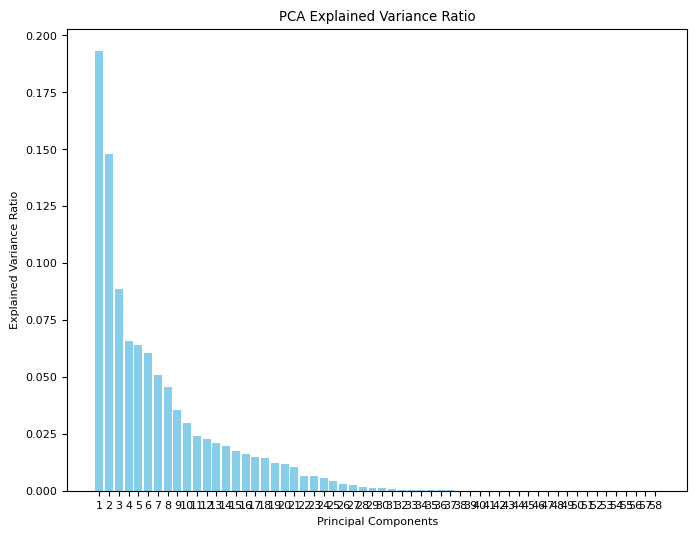

In [10]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def pca(X_train, X_val, y_train, y_val, n_components=None):
    if n_components is None:
        n_components = min(X_train.shape[1], X_val.shape[1])
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    return pca.explained_variance_ratio_

explained_variance = pca(X_train_scaled, X_val_scaled, y_train, y_val)

print("Explained Variance Ratio:", explained_variance)

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='skyblue')
plt.axhline(0, color='black',linewidth=0.5)  # 添加基线
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()


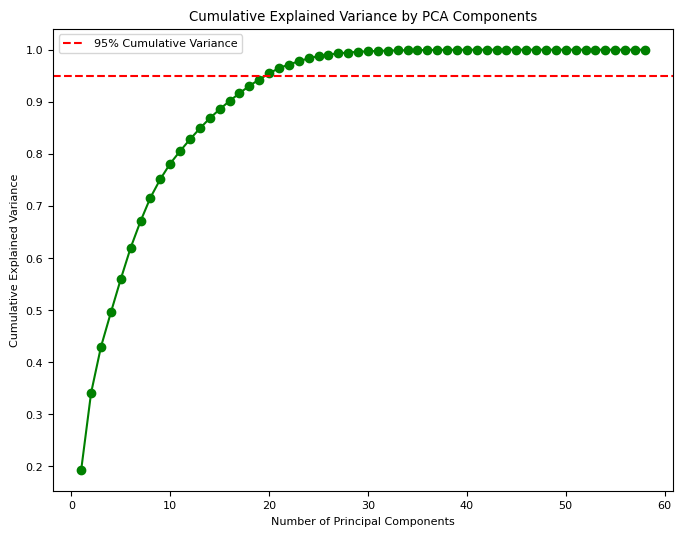

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, color='green', marker='o')
plt.axhline(0.95, color='red', linestyle='--', label='95% Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.legend()
plt.show()


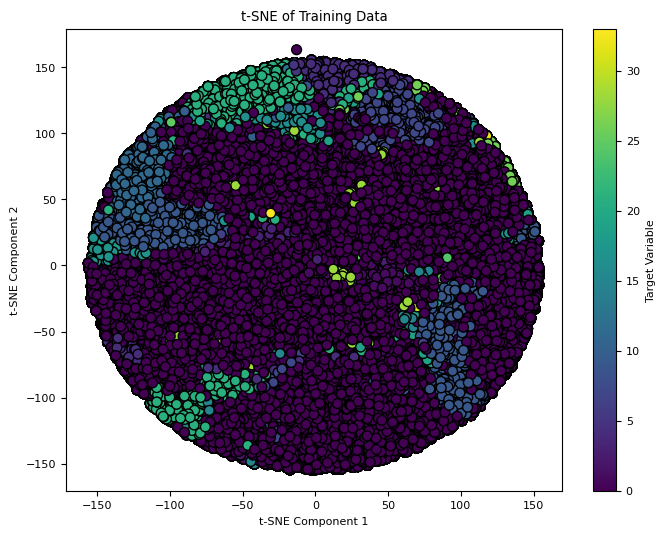

In [13]:
X_train_tsne, X_val_tsne = tsne(X_train_scaled, X_val_scaled, y_train, y_val)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title("t-SNE of Training Data")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label='Target Variable')
plt.show()


/tmp/ipykernel_9161/348473541.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig("Dataset_T_SNE_Projection.png", format="png")
/home/monetai2/anaconda3/envs/alvy/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


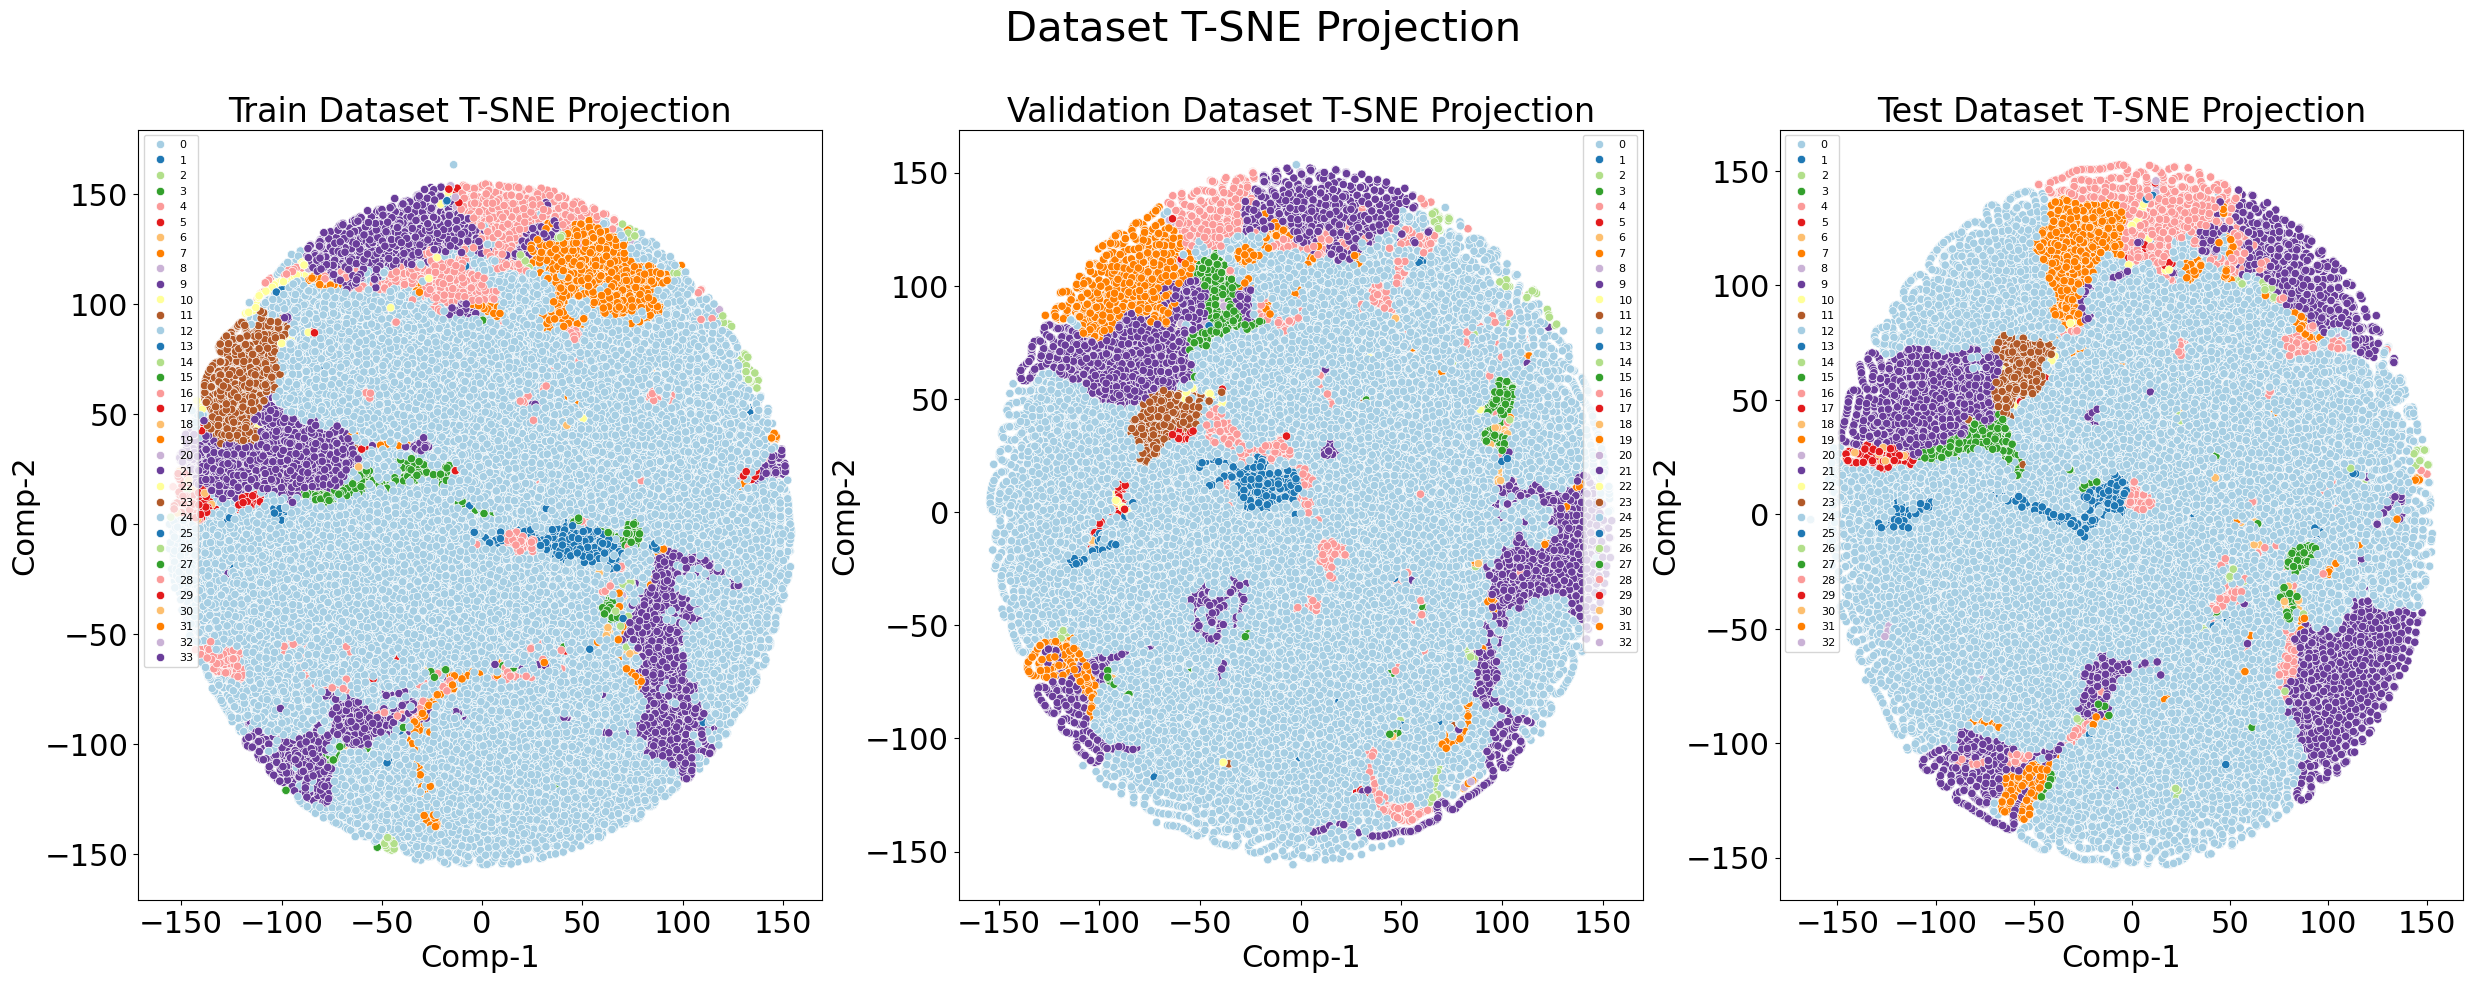

In [15]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np

def check_disk_space():
    st = os.statvfs('/')
    free_space = st.f_bavail * st.f_frsize / (1024 * 1024 * 1024)
    return free_space

def TSNE_visualizer(X):
    tsne = TSNE(n_components=2, random_state=42)
    return tsne.fit_transform(X)

t_sne_train = TSNE_visualizer(np.array(X_train, dtype='float'))
t_sne_val = TSNE_visualizer(np.array(X_val, dtype='float'))
t_sne_test = TSNE_visualizer(np.array(X_test, dtype='float'))

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

titles = ["Train", "Validation", "Test"]
c = [y_train, y_val, y_test]

for i in range(3):
    ax = axes[i]
    t_sne_data = [t_sne_train, t_sne_val, t_sne_test][i]
    sns.scatterplot(x=t_sne_data[:, 0], y=t_sne_data[:, 1], hue=c[i], ax=ax, palette="Paired")
    ax.set_title(f"{titles[i]} Dataset T-SNE Projection", fontsize=24)
    ax.set_xlabel('Comp-1', fontsize=22)
    ax.set_ylabel('Comp-2', fontsize=22)
    ax.tick_params(axis='both', which='major', labelsize=22)

plt.suptitle('Dataset T-SNE Projection', size=30, y=1.0)

if check_disk_space() > 1.0:
    plt.savefig("Dataset_T_SNE_Projection.png", format="png")
else:
    print("Insufficient disk space. Skipping save.")

plt.show()
